In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
costomer_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\Income Data.csv')
costomer_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


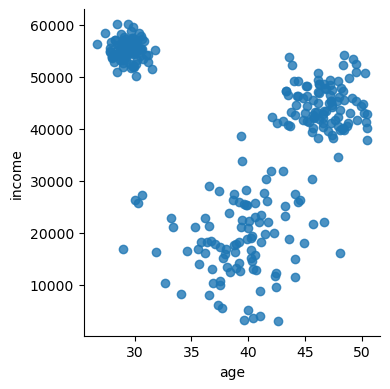

In [34]:
sns.lmplot(x= "age", y= "income", data = costomer_df, fit_reg = False, height= 4)
plt.show()

In [36]:
from sklearn.cluster import KMeans

In [38]:
k= 3
clusters = KMeans(3)
clusters.fit(costomer_df)

KMeans(n_clusters=3)

In [40]:
costomer_df["clusterid"] = clusters.labels_

In [42]:
costomer_df[0:5]

,income,age,clusterid,clusterid_new
0,41100.0,48.75,2,0
1,54100.0,28.10,1,1
2,47800.0,46.75,2,0
3,19100.0,40.25,0,2
4,18200.0,35.80,0,2


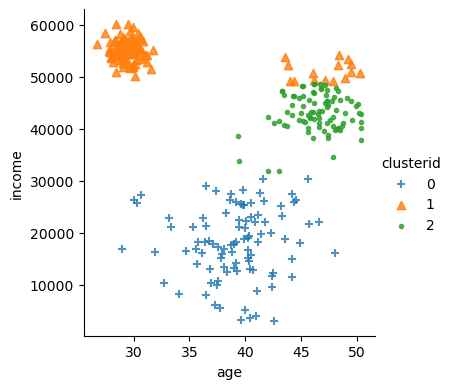

In [68]:
markers = ['+', '^', '.']
sns.lmplot(x = "age", y = "income", data = costomer_df, hue = "clusterid", fit_reg = False, markers = markers, height = 4);
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
scaled_costomer_df = scaler.fit_transform(costomer_df[["age", "income"]])
scaled_costomer_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [62]:
cluster_new = KMeans(3, random_state = 42)
cluster_new.fit(scaled_costomer_df)
costomer_df["clusterid_new"] = cluster_new.labels_

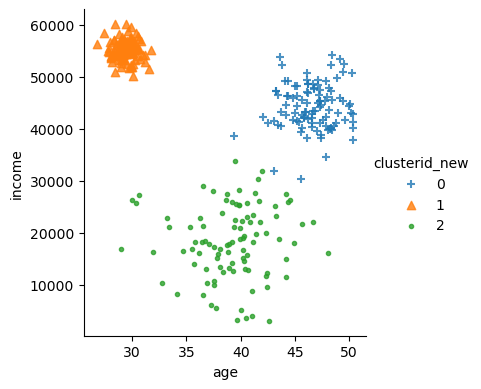

In [70]:
markers= ['+', '^', '.']
sns.lmplot(x= "age", y= "income", data= costomer_df, hue = "clusterid_new", fit_reg = False, markers = markers, height = 4)
plt.show()

In [76]:
clusters.cluster_centers_

array([[ 1.81447917e+04,  3.91744792e+01,  1.02083333e+00,
         1.97916667e+00],
       [ 5.46756522e+04,  3.17004348e+01, -5.55111512e-16,
         8.69565217e-01],
       [ 4.30539326e+04,  4.64191011e+01,  1.93258427e+00,
         4.49438202e-02]])

In [82]:
costomer_df.groupby('clusterid')[['age', 'income']].agg(["mean", "std"]).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  39.174479  3.626068  18144.791667  6745.241906
1         1  31.700435  6.122122  54675.652174  2362.224320
2         2  46.419101  2.289620  43053.932584  3613.769632